<div style="width:100%"><a href="https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-exercices-et-problemes-corriges"><img src="https://python.guillod.org/livre/banner.png"/></a></div>

Ce fichier reflète les énoncés des exercices d'un chapitre du livre *[Programmation Python par la pratique](https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-exercices-et-problemes-corriges)*. Tous les énoncés peuvent être téléchargés au format [Jupyter Notebook](https://python.guillod.org/livre/) ou exécutés directement en ligne sur [GESIS](https://notebooks.gesis.org/binder/v2/gh/guillod/livre-python/master?urlpath=lab). Les corrigés sont disponibles dans le livre en version papier (ISBN [9782100815142](https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-exercices-et-problemes-corriges)) ou numérique (ISBN [9782100819089](https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-exercices-et-problemes-corriges)) publiés chez Dunod. Ce fichier reflète les exercices tels que publiés dans cet ouvrage et diffère quelque peu des exercices présentés à la page [python.guillod.org](https://python.guillod.org/).

# 8 Calcul symbolique

<div id="ch:sympy"></div>

En tant que langage généraliste, Python n'inclut pas par défaut certains concepts mathématiques. Un exemple déjà vu concerne les vecteurs et les matrices numériques qui sont implémentés dans le module Numpy. Le but ici est d'introduire le module Sympy qui permet de faire du calcul symbolique.

Par exemple, le nombre $\sqrt{8}$ est représenté par défaut en Python comme un flottant.
L'avantage de Sympy est que $\sqrt{8}$ est gardé en tant racine et même automatiquement simplifié:

In [1]:
import sympy as sp
sp.init_printing()
sp.sqrt(8)

À noter que la deuxième instruction n'est pas nécessaire, mais permet de présenter les résultats de manière plus élégante dans Jupyter Lab.
La documentation de Sympy est disponible [ici](https://docs.sympy.org/).

**Concepts abordés:**

* symboles et expressions symboliques

* simplification

* analyse infinitésimale (limite, dérivation, intégration, développement limité)

* preuve assistée par ordinateur

* fonction pathologique

* fonction de Green

* coordonnées sphériques



# Exercice 8.1: Introduction à Sympy

Avant de pouvoir utiliser des variables symboliques, il faut les déclarer comme symboles:

In [2]:
x = sp.Symbol("x") # définit le symbole x
y = sp.Symbol("y", real=True) # définit la variable réelle y
e = sp.Symbol(r"\varepsilon", real=True, positive=True) # définit epsilon positif

Ensuite il est possible de faire des opérations entre symboles:

In [3]:
x + 2*y + e/4 + x**2 + 3*x + 2*y

La plupart des fonctions mathématiques sont implémentées symboliquement dans Sympy et il est également possible de les simplifier:

In [4]:
expr = sp.cos(x)**2 + sp.sin(x)**2 + (y**3 + y**2 - y - 1)/(y**2 + 2*y + 1) + sp.exp(-e)
sp.simplify(expr)

Finalement il est possible de faire des substitutions:

In [5]:
expr.subs(x,y) # remplace x par y
expr.subs({y:x, e:y}) # remplace y par x et e par y

puis par exemple de simplifier l'expression et de tracer son graphe en fonction de `x`:

In [6]:
f = sp.simplify(expr.subs({y:x, e:y}))
sp.plot(f,(x,-2,6), title=f"Graphique de ${sp.latex(f)}$")



<center>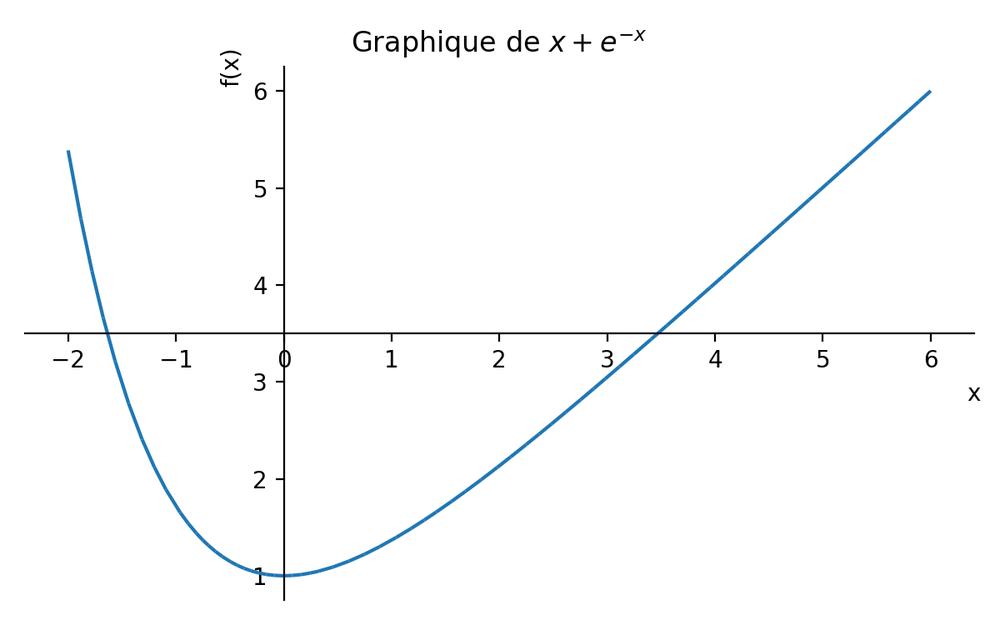</center>

**a)**
Lire la documentation de la fonction `solve` et l'utiliser pour calculer les racines d'un polynôme général de degré deux, puis de degré trois.

**Indication.**
La documentation sur la résolution d'équations algébriques est disponible [ici](https://docs.sympy.org/latest/modules/solvers/solvers.html#algebraic-equations).




**b)**
Lire la documentation des fonctions `evalf` et `N` pour évaluer l'expression $\frac{\pi^2}{4}$.

**Indication.**
La documentation sur l'évaluation numérique est disponible [ici](https://docs.sympy.org/latest/modules/evalf.html).




**c)**
Déterminer la partie réelle et imaginaire de l'expression:

$$
\bigg(\frac{1+i\sqrt{3}}{1+i}\bigg)^{20} \,.
$$



**Indication.**
Voir la documentation [ici](https://docs.sympy.org/latest/modules/functions/elementary.html).




**d)**
Lire la documentation de la fonction `diff` et calculer la dérivée de $x e^{x^{x^x}}$ par rapport à $x$.

**Indication.**
La documentation sur les dérivées est disponible [ici](https://docs.sympy.org/latest/tutorial/calculus.html#derivatives).




**e)**
Lire la documentation de la fonction `integrate` et calculer les intégrales suivantes:

$$
\begin{align*}
I_{1} & =\int x^{5}\sin(x)\,\mathrm{d} x \,, &  I_{2} & =\int_{0}^{\infty}\sin(x^{2})\,\mathrm{d} x \,.
\end{align*}
$$


**f)**
Calculer avec Sympy les limites suivantes:

$$
\begin{align*}
L_{1} & =\lim_{x\to0}\frac{\sin(x)}{x}\,, & L_{2} & =\lim_{x\to0}\sin\bigg(\frac{1}{x}\bigg)\,, & L_{3} & =\lim_{x\to\infty}\frac{5x^{2}+3x+2y}{y(x-4)(x-y)}\,.
\end{align*}
$$


**g)**
Calculer le développement limité de $\tan(x)$ en $x=0$ à l'ordre 10 et le développement asymptotique de $\left(1 + \frac{1}{n}\right)^n$ pour $n\to\infty$ à l'ordre 5.




**h)**
Déterminer les valeurs propres de la matrice:

$$
\begin{pmatrix}1 & a & 0\\ 
a & 2 & a\\ 
0 & a & 3
\end{pmatrix} .
$$



**Indication.**
La documentation sur les matrices symboliques est disponible [ici](https://docs.sympy.org/latest/tutorial/matrices.html).



# Exercice 8.2: Applications

Le but est d'utiliser Sympy pour résoudre symboliquement différents problèmes mathématiques en calculant le moins de choses possibles à la main.

**a)**
Déterminer le nombre de zéros que contient l'entier $123!$.




**b)**
Déterminer le rapport entre la hauteur et le rayon d'un cylindre de manière à minimiser son aire à volume fixé.




**c)**
Pour $x,y\in\mathbb{R}$ tels que $xy < 1$, démontrer que:

$$
\arctan(x) + \arctan(y) = \arctan\left(\frac{x+y}{1-xy}\right) \,.
$$



**Indication.**
Dériver l'équation par rapport à $x$ et justifier.




**d)**
Démontrer la formule suivante due à Gauss:

$$
\frac{\pi}{4} = 12\arctan\left(\frac{1}{38}\right)+20\arctan\left(\frac{1}{57}\right)+7\arctan\left(\frac{1}{239}\right)+24\arctan\left(\frac{1}{268}\right) \,.
$$

Il est impératif d'utiliser Sympy, la démonstration originale de Gauss faisant 25 pages, voir les pages 477 à 502 du deuxième volume de ses œuvres complètes disponible [ici](https://gallica.bnf.fr/ark:/12148/bpt6k99402s).

**Indication.**
Appliquer la fonction tangente de chaque côté de l'équation puis simplifier. La documentation sur les différentes fonctions de simplifications est disponible [ici](https://docs.sympy.org/latest/tutorial/simplification.html).




**e)**
Déterminer le volume de la région:

$$
\big\{(x,y,z)\in\mathbb{R}^3: x^2+y^2 < z < 2x^2+4xy+6y^2, |y| < 5, |x| < 4\big\} \,.
$$


**f)**
Déterminer l'expression des coefficients de Fourier réels de la fonction $2\pi$-périodique $f$ définie par $f(x)=|\sin(x)|$.



# Exercice 8.3: Conjecture due à Euler

Euler a conjecturé en 1769 qu'au moins $k$ puissances $k$-ième d'entiers strictement positifs sont nécessaires pour que la somme soit elle-même une puissance $k$-ième. En d'autres termes si $n \geq 2$, $k \geq 1$, $a_1,a_2,\dots,a_n \geq 1$ et $b \geq 1$ sont des entiers tels que:

$$
\sum_{i=1}^{n}(a_i)^k = b^k
$$

alors nécessairement $n \geq k$.
Cette conjecture a été réfutée en 1966 par Lander & Parkin ([doi:10.1090/S0002-9904-1966-11654-3](https://doi.org/10.1090/S0002-9904-1966-11654-3)) dans ce qui semble être le plus court article mathématique jamais écrit avec un contre-exemple pour $k=5$:

$$
27^5 + 84^5 + 110^5 + 133^5 = 144^5 \,.
$$

Le but est de montrer que ce contre-exemple est le plus simple possible, dans le sens où il est l'unique contre-exemple avec $k \leq 5$ et $b \leq 144$.

**a)**
Démontrer que la conjecture d'Euler est vraie pour $k=1$ et $k=2$.

**b)**
Vérifier avec Python le contre-exemple ci-dessus.




**c)**
Écrire une fonction `powers(bmax,k)` qui retourne l'ensemble (type `set`) de tous les entiers de 1 à `bmax` élevés à la puissance `k`.




**d)**
Vérifier qu'il n'existe pas de contre-exemple avec $k=3$ et $b \leq 144$.




**e)**
Écrire une fonction `combinaisons(liste,n)` qui pour une liste d'entiers `liste` et un entier `n` retourne la liste de toutes les combinaisons de `n` entiers de `liste`
classés par ordre croissant. Par exemple `combinaisons([1,2,3,4],2)` doit retourner
`[(1,1), (1,2), (1,3), (1,4), (2,2), (2,3), (2,4), (3,3), (3,4), (4,4)]`.

**Indication.**
Utiliser une fonction récursive sur `n`.




**f)**
Écrire une fonction `test(bmax,n,k)` qui pour trois entiers `bmax`, `n` et `k` donnés, itère sur toutes les combinaisons de `n` entiers retournés par `combinaisons` et vérifie si la somme de ces `n` entiers élevés à la puissance `k` est un entier présent dans la liste `powers(bmax,k)`. Utiliser cette fonction pour vérifier qu'il n'existe pas de contre-exemple à la conjecture d'Euler pour $k=4$ et $b \leq 144$. Suivant la puissance de votre ordinateur, il est possible de choisir également $k=5$ et donc de vérifier que le contre-exemple de l'introduction est bien le plus simple.




Pour $k=5$, la méthode précédente consistant à itérer sur toutes les combinaisons est plutôt lente. Une méthode plus rapide consiste à observer que l'ensemble des sommes du type:

$$
(a_1)^5 + (a_2)^5 + (a_3)^5 + (a_4)^5 \,,
$$

peut s'écrire comme $S_1 + S_2$ où $S_1$ et $S_2$ sont des sommes de deux entiers à la puissance cinq.

**g)**
Écrire une fonction `sum2(bmax,k)` qui retourne un dictionnaire ayant pour clefs les sommes $(a_1)^k+(a_2)^k$ avec la valeur associée $(a_1,a_2)$ pour $0 \leq a_1 \leq a_2 \leq$ `bmax`. On prendra soin d'enlever l'élément trivial zéro du dictionnaire. Dans la construction du dictionnaire, s'assurer qu'il est défini de manière unique dans le sens où il n'existe pas une autre valeur possible pour une clef existante. Tester `sum2(300,5)` et `sum2(300,3)`.




**h)**
Utiliser le dictionnaire construit précédemment pour déterminer l'ensemble des contre-exemples pour $k=5$ et $b \leq 300$ en itérant sur tous les éléments de `powers(bmax,5)` et de `sum2(bmax,5)`.

**Indication.**
Une implémentation optimale prend au plus quelques secondes à s'exécuter.



# Exercice 8.4: Fonction pathologique

Le but est de construire une fonction qui visuellement semble régulière, mais qui en fait ne l'est pas.
Soit la fonction $f:\mathbb{R}\to\mathbb{R}$ définie par:

$$
f(x) = \sum_{k=1}^{\infty} \frac{\sin(k^2 x)}{k^5} \,.
$$

Vu que la série converge absolument, la fonction $f$ est bien définie.

**a)**
À l'aide de Sympy calculer la fonction $g:\mathbb{R}\to\mathbb{R}$ définie en gardant les cent premiers termes de la série:

$$
g(x) = \sum_{k=1}^{100} \frac{\sin(k^2 x)}{k^5} \,,
$$

et représenter la fonction $g$ graphiquement.




**b)**
Estimer à la main l'erreur entre les fonctions $f$ et $g$ en valeur absolue.




**c)**
Calculer la dérivée première et la dérivée seconde de $g$ et représenter graphiquement ces deux dérivées. Que pouvez-vous conclure ?




**d)**
Expliquer mathématiquement ce qui se passe.



# Exercice 8.5: <font color="red">!</font> Fonction de Green du laplacien

Le but de cet exercice est de calculer entièrement automatiquement la fonction de Green du laplacien dans $\mathbb{R}^3$, *i.e.* la solution satisfaisant:

$$
\Delta G(\boldsymbol{x}) = \delta(\boldsymbol{x}) \,,
$$

dans $\mathbb{R}^3$ où $\delta(\boldsymbol{x})$ est la distribution de Dirac.

Pour cela, nous introduisons les coordonnées sphériques $\boldsymbol{x}^\prime = (r,\theta,\varphi)$ avec $r>0$, $0 \leq \theta \leq \pi$ et $0 \leq \varphi < 2\pi$ caractérisées par:

$$
\begin{align*}
x_1 & =r\cos\varphi\sin\theta\\ 
x_2 & =r\sin\varphi\sin\theta\\ 
x_3 & =r\cos\theta \,.
\end{align*}
$$

**a)**
Définir une fonction `to_spherical(expr)` permettant de convertir en coordonnées sphériques une expression donnée en coordonnées cartésiennes.




**b)**
Définir une fonction `to_cartesian(expr)` permettant de convertir en coordonnées cartésiennes une expression donnée en coordonnées sphériques.




**c)**
Calculer les facteurs d'échelle des coordonnées sphériques:

$$
h_i = \left\Vert \frac{\partial\boldsymbol{x}}{\partial x^\prime_i} \right\Vert.
$$


**d)**
Définir une fonction `gradient(f)` permettant de calculer le gradient d'une fonction $f:\mathbb{R}^3\to\mathbb{R}$ en coordonnées sphériques:

$$
\boldsymbol{\nabla}f = \left( \frac{1}{h_i}\frac{\partial f}{\partial x^\prime_i} \right)_{i=1}^3\,.
$$


**e)**
Faire de même pour définir le laplacien en coordonnées sphériques:

$$
\Delta f = \sum_{i=1}^3 \frac{1}{J} \frac{\partial}{\partial x^\prime_i} \left( \frac{J}{h_i^2} \frac{\partial f}{\partial x^\prime_i} \right) \quad \text{où} \quad J = \prod_{i=1}^3 h_i \,.
$$


**f)**
Trouver les solutions radiales (*i.e.* ne dépendant que de la variable $r$) de l'équation $\Delta G = 0$ dans $\mathbb{R}^3\setminus\{\boldsymbol{0}\}$.

**Indication.**
Regarder la documentation de la fonction `dsolve` pour résoudre une équation différentielle.




**g)**
Déterminer les équations que doivent satisfaire les constantes d'intégration pour que la solution précédente satisfasse en coordonnées cartésiennes:

$$
\lim_{|\boldsymbol{x}|\to\infty} G(\boldsymbol{x}) = 0 \quad \text{et} \quad \Delta G(\boldsymbol{x}) = \delta(\boldsymbol{x}) \,.
$$



**Indication.**
Il faut transformer les deux conditions en coordonnées sphériques.
La première condition s'exprime en coordonnées sphériques par:

$$
\lim_{r\to\infty} G(r) = 0 \,,
$$

et la seconde est équivalente à:

$$
\lim_{r \to 0} \int_{0}^{\pi} \int_{0}^{2\pi} \big( \boldsymbol{\nabla} G(r) \boldsymbol{\cdot} \boldsymbol{e}_r \big) \, J(r,\theta,\varphi) \, \mathrm{d}\varphi \mathrm{d}\theta = 1\,.
$$


**h)**
Résoudre les équations sur les constantes d'intégrations et substituer dans la solution radiale de $\Delta G = 0$ pour obtenir l'expression de la fonction de Green du laplacien en coordonnées sphériques. Finalement déterminer la fonction de Green $G$ du laplacien dans $\mathbb{R}^3$ en coordonnées cartésiennes.




**i)**
<font color="red">!!</font>
Soit $g:\mathbb{R}^3 \to \mathbb{R}$ une fonction lisse à support compact invariante par rotations selon l'axe vertical. Déterminer le comportement asymptotique à grandes distances de la solution de l'équation:

$$
\Delta f(\boldsymbol{x}) = g(\boldsymbol{x}) \,
$$

jusqu'à l'ordre deux, *i.e.* les termes décroissant comme $|\boldsymbol{x}|^{-1}$ et comme $|\boldsymbol{x}|^{-2}$.

**Indication.**
La solution est donnée par la formule de Green:

$$
f(\boldsymbol{x}) = \int_{\mathbb{R}^3} G(\boldsymbol{x}-\boldsymbol{x}_0) g(\boldsymbol{x}_0) \, \mathrm{d}^3\boldsymbol{x}_0 = \int_{B_R} G(\boldsymbol{x}-\boldsymbol{x}_0) g(\boldsymbol{x}_0) \, \mathrm{d}^3\boldsymbol{x}_0 \,,
$$

où $R$ est choisi de sorte que le support de $g$ soit contenu dans $B_R$.
Pour calculer le développement asymptotique de cette intégrale, la première étape est de convertir $G(\boldsymbol{x}-\boldsymbol{x}_0)$ en coordonnées sphériques pour $\boldsymbol{x}$ et $\boldsymbol{x}_0$. Vu que $g$ est invariante par rotations selon l'axe vertical, alors en coordonnées sphériques $g$ est indépendante de $\varphi$ et est donnée par $g(r,\theta)$.
La deuxième étape est de transformer l'intégrale en coordonnées sphériques avec une intégrale triple sur $r_0$, $\theta_0$ et $\varphi_0$.
La troisième étape est de calculer le développement asymptotique de l'intégrant lorsque $r\to\infty$, jusqu'à l'ordre deux. Finalement, vu que $r_0$, $\theta_0$ et $\varphi_0$ sont bornés, alors l'intégration commute avec le développement asymptotique et le résultat final est donné par l'intégration individuelle des deux termes du développement asymptotique.

